In [1]:
import optforge as of
import mealpy
from optforge.benchmark.vobench_benchmarks import VOBenchmark
import vobench as vb
import numpy as np

inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A.jpeg")[:,:,0]

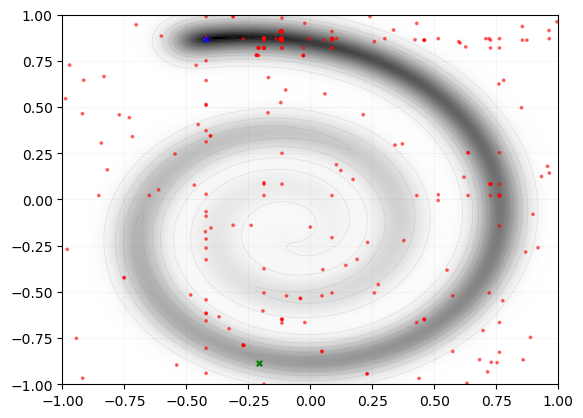

In [2]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

class Descent(mealpy.Problem):

    def __init__(self):
        super().__init__([mealpy.FloatVar((-1,-1), (1,1), name = 'xy')], log_to = None)  # type:ignore

    def obj_func(self, x):
        xy = self.decode_solution(x)["xy"]
        return vob.step_noline(xy)

problem = Descent()
model = mealpy.GA.BaseGA(epoch=10, pop_size=100)
model.solve(problem, seed = 0)

vob.plot()

evals: 1000/1000 | best value: 0.1143                            
Job finished in 0.7s., did 1000 evaluations.


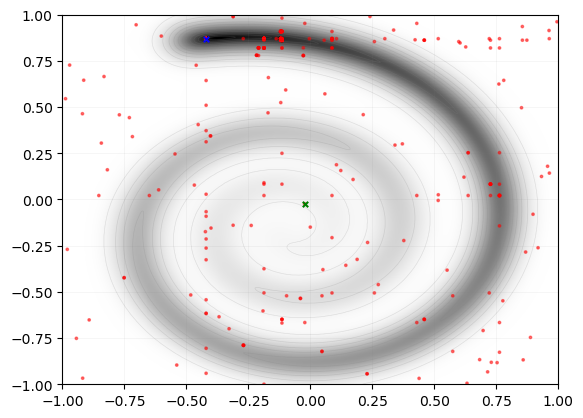

In [3]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.MealpyOptimizer(
    mealpy.GA.BaseGA,
    seed = 0,
)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1)
)

vob.plot()

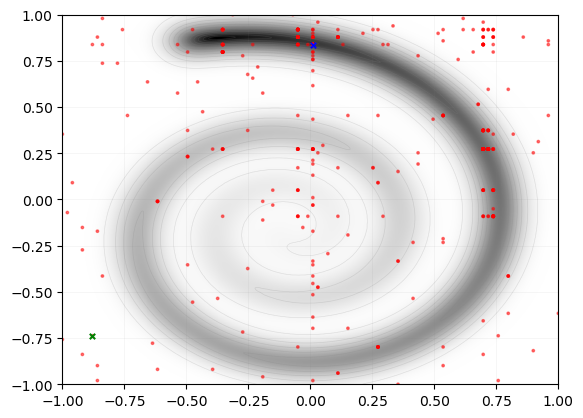

In [4]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

class Descent(mealpy.Problem):
    def __init__(self):
        super().__init__([mealpy.MixedSetVar((np.linspace(-1, 1, 100), ) * 2, name = 'xy')], log_to = None)

    def obj_func(self, x):
        xy = self.decode_solution(x)["xy"]
        return vob.step_noline(xy)

problem = Descent()
model = mealpy.GA.BaseGA(epoch=10, pop_size=100)
model.solve(problem, seed = 0)

vob.plot()

evals: 1000/1000 | best value: 0.2531                            
Job finished in 1.0s., did 1000 evaluations.


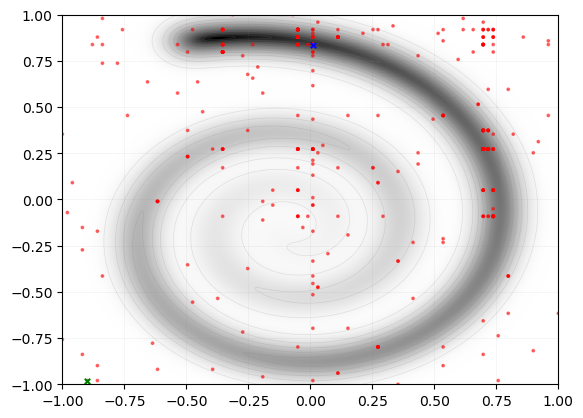

In [5]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def objective(trial: of.Trial):
    xy = trial.suggest_categorical_array('xy', 2, np.linspace(-1, 1, 100), one_hot=False)
    return vob.step_noline(np.array(xy))

optimizer = of.integrations.MealpyOptimizer(
    mealpy.GA.BaseGA,
    seed = 0,
)

study = of.minimize_trial_func(
    objective,
    optimizer,
    max_evals = 1000,
)

vob.plot()

evals: 1000/1000 | best value: 0.0730                            
Job finished in 1.1s., did 1000 evaluations.


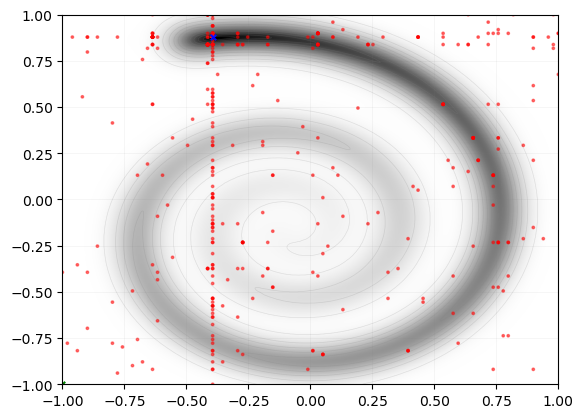

In [6]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def objective(trial: of.Trial):
    xy = trial.suggest_categorical_array('xy', 2, np.linspace(-1, 1, 100), one_hot=True)
    return vob.step_noline(np.array(xy))

optimizer = of.integrations.MealpyOptimizer(
    mealpy.GA.BaseGA,
    seed = 0,
)

study = of.minimize_trial_func(
    objective,
    optimizer,
    max_evals = 1000,
)

vob.plot()